
Welcome to the Banknote Authentication Model Evaluation Program!

This program allows you to:
1. Load and preprocess the banknote dataset.
2. Train and evaluate four different models:
   - Random Forest
   - Deep Learning: LSTM (Long Short Term Memory)
   - Algorithm: KNN (K-Nearest Neighbor)
   - Algorithm: SVM (Support Vector Machine)
3. Generate detailed insights and recommendations based on the evaluation results.

**IMPORTANT**: For optimal readability and proper formatting of outputs, please use the terminal in full-screen view.

You will receive:
   - A description of the dataset.
   - Information about the dataset, including data types, missing values, etc.
   - A preview of the first few records in the dataset (head).
   - Metric Table showing the results of 10-fold cross-validation for each model.
   - Table displaying the average metrics across all 10 folds for each model.
   - Dynamic insights and recommendations based on the performance of models.

**Graphs you'll see**:


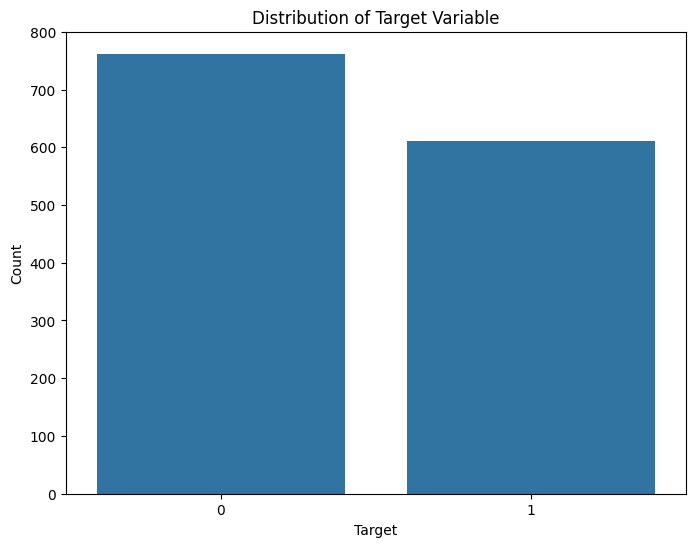


Checking for Data Imbalance:
   - Number of Positive Outcomes: 762
   - Percentage of Positive Outcomes: 55.54%
   - Number of Negative Outcomes: 610
   - Percentage of Negative Outcomes: 44.46%




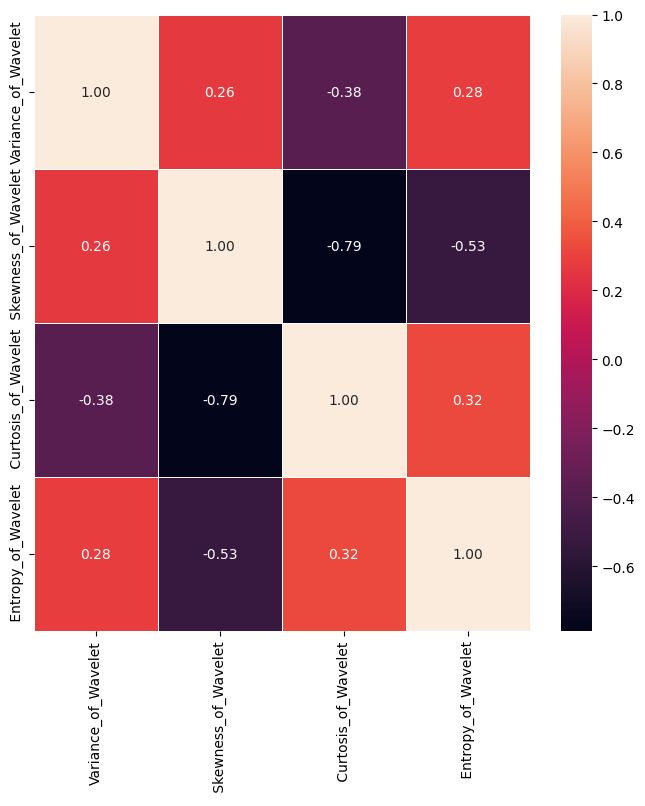

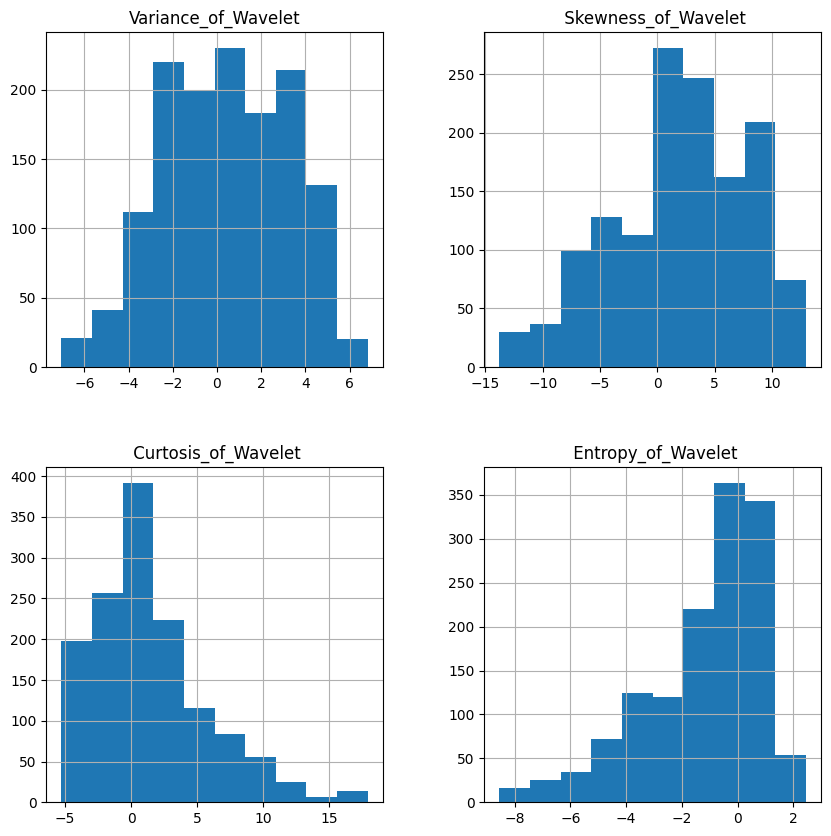

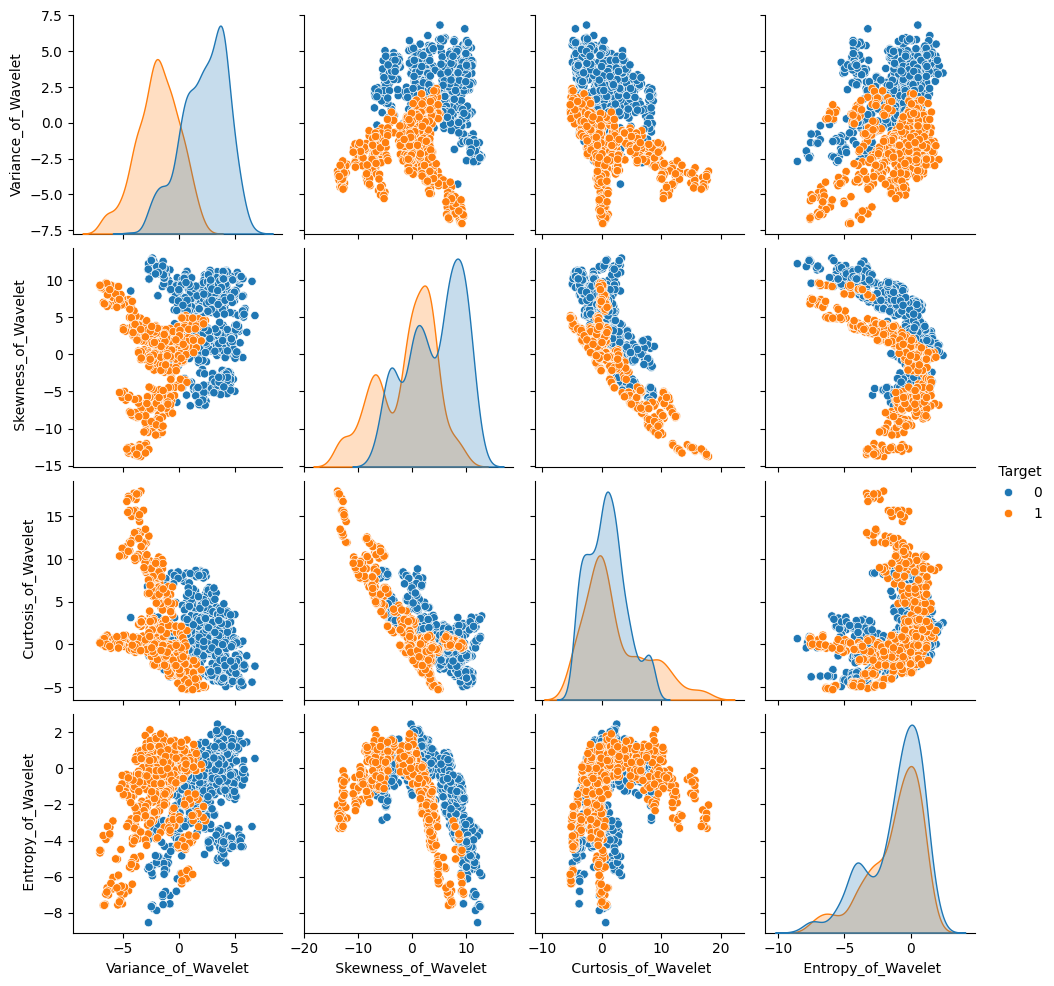



The model optimization and training process may take a few minutes.
It might feel like it's taking forever, but don't worry—it will complete successfully! :)



Optimization Parameters for models: 
Parameters for KNN: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Parameters for KNN: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Parameters for KNN: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Parameters for KNN: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Parameters for KNN: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Parameters for KNN: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Parameters for KNN: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Parameters for KNN: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Parameters for KNN: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Parameters for KNN: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms

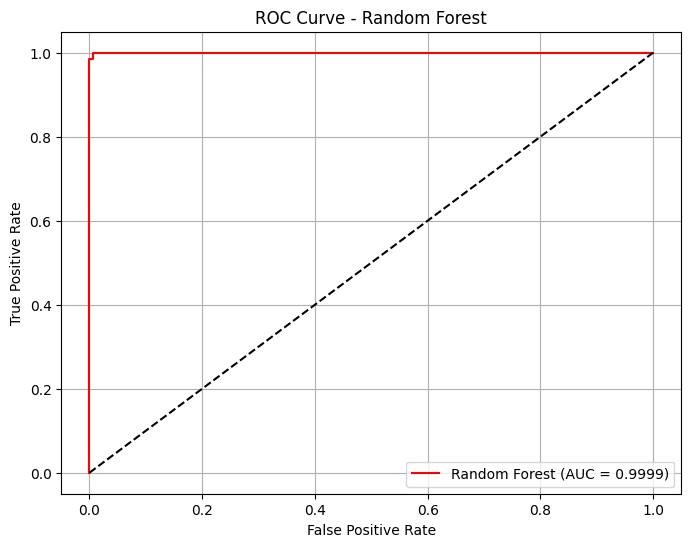

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step


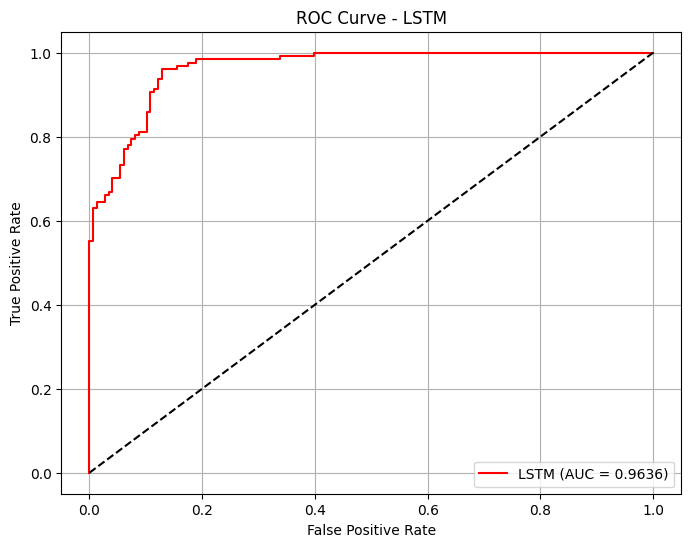

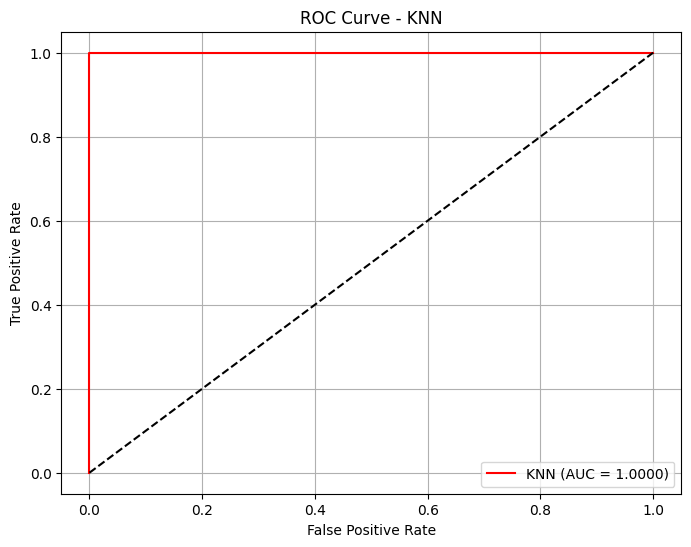

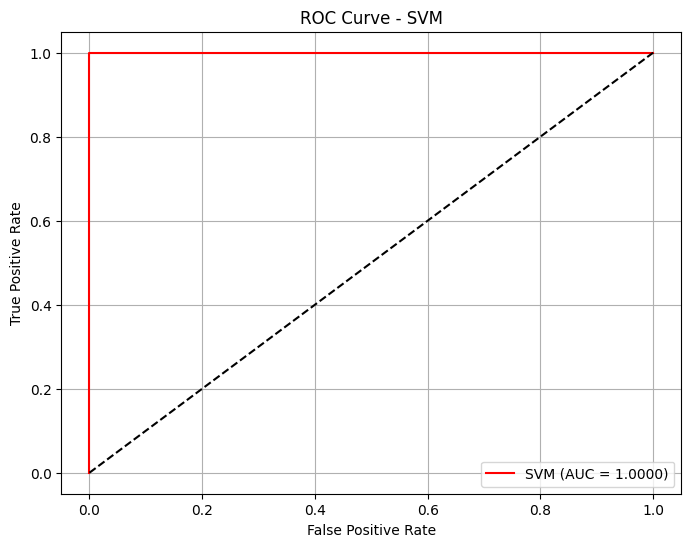


================================================== " Insights " ==================================================

1. Best and Worst Models for Each Metric:
+-----------+---------------+---------------+
| Metric    | Best Model    | Worst Model   |
+===========+===============+===============+
| Accuracy  | SVM           | LSTM          |
+-----------+---------------+---------------+
| Recall    | KNN           | LSTM          |
+-----------+---------------+---------------+
| Precision | SVM           | LSTM          |
+-----------+---------------+---------------+
| F1_Score  | SVM           | LSTM          |
+-----------+---------------+---------------+
| TPR       | KNN           | LSTM          |
+-----------+---------------+---------------+
| TNR       | SVM           | LSTM          |
+-----------+---------------+---------------+
| FPR       | LSTM          | SVM           |
+-----------+---------------+---------------+
| FNR       | LSTM          | KNN           |
+-----------+

In [ ]:
# Set up the environment for TensorFlow, suppress unnecessary logs, and warnings
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'  # Disable oneDNN optimizations for TensorFlow
import tensorflow as tf
tf.get_logger().setLevel('ERROR')  # Suppress TensorFlow logs
import warnings
warnings.filterwarnings("ignore")  # Suppress all warnings

# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from tabulate import tabulate
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import confusion_matrix, roc_curve, auc, brier_score_loss



# Welcome Message and User Prompt
def welcome_message():
    print("\n" + "=" * 162)
    print("Welcome to the Banknote Authentication Model Evaluation Program!")
    print("\nThis program allows you to:")
    print("1. Load and preprocess the banknote dataset.")
    print("2. Train and evaluate four different models:")
    print("   - Random Forest")
    print("   - Deep Learning: LSTM (Long Short Term Memory)")
    print("   - Algorithm: KNN (K-Nearest Neighbor)")
    print("   - Algorithm: SVM (Support Vector Machine)")
    print("3. Generate detailed insights and recommendations based on the evaluation results.")

    print("\n**IMPORTANT**: For optimal readability and proper formatting of outputs, please use the terminal in full-screen view.")

    print("\nYou will receive:")
    print("   - A description of the dataset.")
    print("   - Information about the dataset, including data types, missing values, etc.")
    print("   - A preview of the first few records in the dataset (head).")
    print("   - Metric Table showing the results of 10-fold cross-validation for each model.")
    print("   - Table displaying the average metrics across all 10 folds for each model.")
    print("   - Dynamic insights and recommendations based on the performance of models.")

    print("\n**Graphs you'll see**:")
    print("   - Distribution of the target variable (Target)")
    print("   - Correlation matrix heatmap showing relationships between features")
    print("   - Pair plot visualizing data relationships with the target variable")
    print("   - Visualizing the model's performance with ROC curves for each model.")

    print("\nPress 'Enter' to continue with the analysis...")
    input()  # Wait for the user to press Enter before continuing
    print("=" * 162 + "\n")


# Load Dataset Function
def load_data(file_path):
    """
    Load dataset from the provided file path.

    Parameters:
        file_path (str): Path to the CSV file.

    Returns:
        pd.DataFrame: Loaded dataset as a Pandas DataFrame, or None if an error occurs.
    """
    try:
        data = pd.read_csv(file_path)
        if data.empty:
            raise ValueError("The dataset is empty.")
        return data
    except Exception as e:
        print(f"Error loading the dataset: {e}")
        return None


# Preprocess Dataset Function
def preprocess_data(data):
    """
    Preprocess the dataset to handle missing values, validate the target column, and scale features.

    Parameters:
        data (pd.DataFrame): Input dataset.

    Returns:
        tuple: Scaled train-test splits (X_train, X_test, y_train, y_test), or None if validation fails.
    """
    # Handle missing values
    if data.isnull().sum().any():
        print("Missing values detected. Filling missing values with mean (for numeric columns)...")
        data.fillna(data.mean(), inplace=True)

    # Validate dataset structure
    if data.shape[1] < 2:
        print("Dataset is not valid. There should be at least one feature column and a target column.")
        return None

    # Split data into features (X) and target (y)
    X = data.iloc[:, :-1].values  # Features (all columns except the last)
    y = data.iloc[:, -1].values   # Target variable (last column)

    # Validate target column (binary classification)
    if not set(y).issubset({0, 1}):
        print("Error: The target variable should only contain binary labels (0, 1).")
        return None

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test


# Call the Welcome Message Function
welcome_message()

# Load and preprocess the dataset
data = load_data('./banknote_data.csv')
X_train, X_test, y_train, y_test = preprocess_data(data)

# Reshape data for LSTM (expects 3D input)
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])  # Reshaped to (samples, 1, features)
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])      # Same reshaping for test data

# Feature and Label Separation
features = data.iloc[:, :-1]  # All columns except the last (features)
labels = data.iloc[:, -1]     # Last column (labels)

# Visualize the Target Variable Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=labels)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Calculate and Display Data Imbalance Information
positive_outcomes, negative_outcomes = labels.value_counts()
total_samples = labels.count()
print("\nChecking for Data Imbalance:")
print(f"   - Number of Positive Outcomes: {positive_outcomes}")
print(f"   - Percentage of Positive Outcomes: {round((positive_outcomes / total_samples) * 100, 2)}%")
print(f"   - Number of Negative Outcomes: {negative_outcomes}")
print(f"   - Percentage of Negative Outcomes: {round((negative_outcomes / total_samples) * 100, 2)}%")
print("\n\n" + "=" * 162)

# Create and Display Correlation Heatmap
fig, axis = plt.subplots(figsize=(8, 8))
correlation_matrix = features.corr()
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, fmt='.2f', ax=axis)
plt.show()

# Plot Histograms for Feature Distribution
features.hist(figsize=(10, 10))
plt.show()

# Create a Pairplot to Visualize Feature Relationships with the Target Variable
sns.pairplot(data, hue=' Target')
plt.show()

print('''\n\nThe model optimization and training process may take a few minutes. It might feel like it's taking forever, but don't worry—it will complete successfully! :)\n\n''')
print("\nOptimization Parameters for models: ")

# Function to optimize KNN classifier
def optimize_knn(X_train, y_train):
    """
    Optimizes the KNN model using GridSearchCV to find the best hyperparameters.
    Parameters:
        X_train: Features of the training dataset.
        y_train: Labels of the training dataset.
    Returns:
        Best KNN model after hyperparameter tuning.
    """
    # Feature scaling for better distance calculations
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)

    # Handle class imbalance using SMOTE
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    # Define hyperparameter grid for KNN
    param_grid = {
        'n_neighbors': [3, 5, 7],  # Number of neighbors to use
        'weights': ['uniform', 'distance'],  # Weighting strategy
        'p': [1, 2]  # Distance metric: Manhattan (1) or Euclidean (2)
    }

    # Perform grid search
    grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    print("Parameters for KNN:", grid.best_params_)

    return grid.best_estimator_

# Function to optimize Random Forest classifier
def optimize_random_forest(X_train, y_train):
    """
    Optimizes the Random Forest model using RandomizedSearchCV to find the best hyperparameters.
    Parameters:
        X_train: Features of the training dataset.
        y_train: Labels of the training dataset.
    Returns:
        Best Random Forest model after hyperparameter tuning.
    """
    # Define hyperparameter grid for Random Forest
    param_grid = {
        'n_estimators': [50, 100],  # Number of trees in the forest
        'max_depth': [None, 10],  # Maximum depth of the tree
        'min_samples_split': [5, 10],  # Minimum number of samples to split a node
        'min_samples_leaf': [2, 4]  # Minimum number of samples in a leaf node
    }

    # Perform randomized search
    grid = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_grid,
                              n_iter=10, cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    print("Parameters for Random Forest:", grid.best_params_)

    return grid.best_estimator_

# Function to optimize SVM
def optimize_svm(X_train, y_train):
    """
    Optimizes the SVM model using GridSearchCV to find the best hyperparameters.
    Parameters:
        X_train: Features of the training dataset.
        y_train: Labels of the training dataset.
    Returns:
        Best SVM model after hyperparameter tuning.
    """
    # Feature scaling for better SVM performance
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)

    # Handle class imbalance using SMOTE
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    # Define hyperparameter grid for SVM
    param_grid = {
        'C': [0.1, 1, 10],  # Regularization parameter
        'kernel': ['linear', 'rbf'],  # Kernel type
        'gamma': [0.01, 0.1, 'scale']  # Kernel coefficient
    }

    # Perform grid search
    grid = GridSearchCV(SVC(probability=True), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    print("Parameters for SVM:", grid.best_params_)

    return grid.best_estimator_

# Function to optimize LSTM
def optimize_lstm(X_train, y_train, input_shape):
    """
    Optimizes the LSTM model using RandomizedSearchCV to find the best hyperparameters.
    Parameters:
        X_train: Features of the training dataset.
        y_train: Labels of the training dataset.
        input_shape: Shape of the input data for LSTM.
    Returns:
        Best LSTM model after hyperparameter tuning.
    """
    # Reshape the input data for LSTM compatibility
    X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

    # Define the LSTM model architecture
    def create_model(optimizer='adam'):
        model = Sequential()
        model.add(LSTM(50, activation='relu', input_shape=input_shape))  # LSTM layer with 50 units
        model.add(Dropout(0.2))  # Dropout layer to reduce overfitting
        model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        return model

    # Wrap the model for compatibility with RandomizedSearchCV
    model = KerasClassifier(build_fn=create_model, verbose=0)

    # Define hyperparameter grid for LSTM
    param_grid = {
        'optimizer': ['adam', 'rmsprop'],  # Optimizers to test
        'batch_size': [16, 32, 64],  # Batch sizes
        'epochs': [5, 10],  # Number of epochs
    }

    # Perform randomized search
    grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=3, n_iter=5)

    # Fit the model using randomized search
    grid.fit(X_train, y_train)

    # Print best parameters after fitting
    print("Best Parameters for LSTM:", grid.best_params_)

    # Use EarlyStopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)

    # Re-train the model with the best hyperparameters
    model = grid.best_estimator_
    model.fit(X_train, y_train, epochs=grid.best_params_['epochs'], batch_size=grid.best_params_['batch_size'], callbacks=[early_stopping])

    return model

# Updated training functions to include optimization
def train_knn_optimized(X_train, y_train):
    model = optimize_knn(X_train, y_train)
    model.fit(X_train, y_train)
    return model

def train_random_forest_optimized(X_train, y_train):
    model = optimize_random_forest(X_train, y_train)
    model.fit(X_train, y_train)
    return model

def train_svm_optimized(X_train, y_train):
    model = optimize_svm(X_train, y_train)
    model.fit(X_train, y_train)
    return model

def train_lstm_optimized(X_train, y_train, input_shape):
    X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))  # Reshaping for LSTM
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=input_shape))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)

    return model

# General evaluation function
def evaluate_model(model, X_test, y_test):
    # Check if the model is KNN
    if isinstance(model, KNeighborsClassifier):
        y_pred = model.predict(X_test)
        y_pred_class = (y_pred > 0.5).astype(int)  # Assuming binary classification
    # Check if the model is Random Forest
    elif isinstance(model, RandomForestClassifier):
        y_pred = model.predict(X_test)
        y_pred_class = (y_pred > 0.5).astype(int)  # Assuming binary classification
    # Check if the model is SVM
    elif isinstance(model, SVC):
        y_pred = model.predict(X_test)
        y_pred_class = (y_pred > 0.5).astype(int)  # Assuming binary classification
    # Check if the model is LSTM
    elif isinstance(model, Sequential) and isinstance(model.layers[0], LSTM):
        X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))  # Reshaping for LSTM
        y_pred = model.predict(X_test)
        y_pred_class = (y_pred > 0.5).astype(int)  # Assuming binary classification
    else:
        y_pred = model.predict(X_test)
        y_pred_class = (y_pred > 0.5).astype(int)  # Assuming binary classification
    # Extracting metrics from confusion matrix
    cm = confusion_matrix(y_test, y_pred_class)
    tn, fp, fn, tp = cm.ravel()
    p = tp + fn
    n = tn + fp
    accuracy = (tp + tn) / (p + n)
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    f1_score = (2 * tp) / (2 * tp + fp + fn)
    tpr = tp / (tp + fn)  # True Positive Rate
    tnr = tn / (tn + fp)  # True Negative Rate
    fpr = fp / (tn + fp)  # False Positive Rate
    fnr = fn / (fn + tp)  # False Negative Rate
    error_rate = (fp + fn) / (p + n)  # Error rate
    bacc = (tpr + tnr) / 2  # Balanced Accuracy
    tss = tpr - fpr  # True Skill Statistic
    hss = (2 * (tp * tn - fp * fn)) / ((tp + fn) * (tn + fp) + (tn + fp) * (tp + fn))  # Heidke Skill Score
    bs = brier_score_loss(y_test, y_pred)  # Brier Score (BS)
    # Brier Skill Score (BSS)
    baseline_prediction = np.mean(y_test)
    bs_baseline = brier_score_loss(y_test, [baseline_prediction] * len(y_test))
    bss = 1 - (bs / bs_baseline)
    # AUC (Area Under the ROC Curve)
    fpr_roc, tpr_roc, _ = roc_curve(y_test, y_pred)
    auc_score = auc(fpr_roc, tpr_roc)

    result = [accuracy, recall, precision, f1_score, tpr, tnr, fpr, fnr, p, n, error_rate, bacc, tss, hss, bs, bss, auc_score]

    return result

# Function to perform 10-fold cross-validation for a given model type
def cross_validation_evaluation(X, y, model_type):
    # Initialize a stratified k-fold cross-validation object to maintain class distribution
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Dictionary to store metrics for each fold
    metrics = {
        'Fold': [],
        'Accuracy': [],
        'Recall': [],
        'Precision': [],
        'F1_Score': [],
        'TPR': [],  # True Positive Rate
        'TNR': [],  # True Negative Rate
        'FPR': [],  # False Positive Rate
        'FNR': [],  # False Negative Rate
        'P': [],    # Number of positive samples
        'N': [],    # Number of negative samples
        'ER': [],   # Error Rate
        'BACC': [], # Balanced Accuracy
        'TSS': [],  # True Skill Statistic
        'HSS': [],  # Heidke Skill Score
        'BS': [],   # Brier Score
        'BSS': [],  # Brier Skill Score
        'AUC': []   # Area Under the Curve
    }
    Fold = 0  # Counter to track fold number

    # Loop through each fold in the cross-validation process
    for train_index, test_index in skf.split(X_train, y_train):
        Fold += 1
        # Split the data into training and testing sets for the current fold
        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

        # Train the appropriate model based on the input model type
        if model_type == "knn":
            model = train_knn_optimized(X_train_fold, y_train_fold)  # Train KNN
            result = evaluate_model(model, X_test_fold, y_test_fold)  # Evaluate KNN
        elif model_type == "lstm":
            model = train_lstm_optimized(X_train_fold, y_train_fold, (1, X_train.shape[1]))  # Train LSTM
            result = evaluate_model(model, X_test_fold, y_test_fold)  # Evaluate LSTM
        elif model_type == "rf":
            model = train_random_forest_optimized(X_train_fold, y_train_fold)  # Train Random Forest
            result = evaluate_model(model, X_test_fold, y_test_fold)  # Evaluate Random Forest
        elif model_type == "svm":
            model = train_svm_optimized(X_train_fold, y_train_fold)  # Train SVM
            result = evaluate_model(model, X_test_fold, y_test_fold)  # Evaluate SVM

        # Append metrics for the current fold
        metrics['Fold'].append(Fold)
        metrics['Accuracy'].append(result[0])
        metrics['Recall'].append(result[1])
        metrics['Precision'].append(result[2])
        metrics['F1_Score'].append(result[3])
        metrics['TPR'].append(result[4])
        metrics['TNR'].append(result[5])
        metrics['FPR'].append(result[6])
        metrics['FNR'].append(result[7])
        metrics['P'].append(result[8])
        metrics['N'].append(result[9])
        metrics['ER'].append(result[10])
        metrics['BACC'].append(result[11])
        metrics['TSS'].append(result[12])
        metrics['HSS'].append(result[13])
        metrics['BS'].append(result[14])
        metrics['BSS'].append(result[15])
        metrics['AUC'].append(result[16])

    # Convert the metrics dictionary into a DataFrame for easier analysis
    metrics_df = pd.DataFrame(metrics)
    return metrics_df

# Evaluate models using 10-fold cross-validation for each model type
# The results will include detailed metrics for each fold and each model
knn_metrics = cross_validation_evaluation(X_train, y_train, "knn")  # Evaluate KNN
lstm_metrics = cross_validation_evaluation(X_train, y_train, "lstm")  # Evaluate LSTM
rf_metrics = cross_validation_evaluation(X_train, y_train, "rf")  # Evaluate Random Forest
svm_metrics = cross_validation_evaluation(X_train, y_train, "svm")  # Evaluate SVM

# Function to explain the evaluation metrics to users
def print_metrics_intro():
    print("\n" + "=" * 60 + ' " Metrics Overview " ' + "=" * 60 + "\n")
    print("The following metrics will be used to evaluate the models:")
    print("\n1. **Accuracy**: Measures the overall correctness of the model's predictions.")
    print("2. **Recall (Sensitivity)**: Represents the model's ability to identify positive outcomes.")
    print("3. **Precision**: Shows how many of the predicted positive outcomes are actually correct.")
    print("4. **F1-Score**: Combines precision and recall, providing a balance between the two.")
    print("5. **True Positive Rate (TPR)**: The proportion of actual positives correctly identified by the model.")
    print("6. **True Negative Rate (TNR)**: The proportion of actual negatives correctly identified.")
    print("7. **False Positive Rate (FPR)**: The proportion of actual negatives incorrectly classified as positives.")
    print("8. **False Negative Rate (FNR)**: The proportion of actual positives incorrectly classified as negatives.")
    print("9. **P**: Total number of positive samples.")
    print("10. **N**: Total number of negative samples.")
    print("11. **Error Rate (ER)**: The proportion of incorrect predictions made by the model.")
    print("12. **Balanced Accuracy (BACC)**: The average of TPR and TNR, balancing performance on both classes.")
    print("13. **True Skill Statistic (TSS)**: Measures the difference between the proportion of correctly predicted positives and negatives.")
    print("14. **Heidke Skill Score (HSS)**: Evaluates the skill of the model by comparing observed accuracy to expected accuracy.")
    print("15. **Brier Score (BS)**: A metric that quantifies the accuracy of probabilistic predictions.")
    print("16. **Brier Skill Score (BSS)**: Compares the Brier score of the model to a baseline model.")
    print("17. **AUC (Area Under the Curve)**: Measures the model's ability to distinguish between classes based on the ROC curve.")
    print("\nThese metrics will be calculated for each fold in the 10-fold cross-validation process, and the average results across all folds will be presented.")
    print("\nNow, let's proceed with the 10-fold cross-validation results for each model:")

# Call the function to display metrics explanation
print_metrics_intro()

# Print results for each model in tabular format
print("\n\n" + "=" * 65 + ' " 10-Fold Cross Validation Results " ' + "=" * 65)
print("\n\nRandom Forest Results: ")
print(tabulate(rf_metrics.round(3), headers='keys', tablefmt='grid', showindex=False))  # Display Random Forest results
print("\n\n" + "=" * 162)

print("\n\nLSTM Results: ")
print(tabulate(lstm_metrics.round(3), headers='keys', tablefmt='grid', showindex=False))  # Display LSTM results
print("\n\n" + "-" * 162)

print("\n\nKNN Results: ")
print(tabulate(knn_metrics.round(3), headers='keys', tablefmt='grid', showindex=False))  # Display KNN results
print("\n\n" + "-" * 162)

print("\n\nSVM Results: ")
print(tabulate(svm_metrics.round(3), headers='keys', tablefmt='grid', showindex=False))  # Display SVM results
print("\n\n" + "-" * 162)


# Train models on the full training dataset
print("Best Parameters for models: ")
rf_model = train_random_forest_optimized(X_train, y_train)  # Train Random Forest
lstm_model = train_lstm_optimized(X_train, y_train, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))  # Train LSTM
knn_model = train_knn_optimized(X_train, y_train)  # Train KNN
svm_model = train_svm_optimized(X_train, y_train)  # Train SVM

# Function to calculate average metrics for each model
# This function computes the mean of all metrics across the 10 cross-validation folds
# for a given model and rounds the results to 3 decimal places.
def calculate_average(metrics):
    return metrics.mean(axis=0).round(3)

# Get average metrics for each model using the calculate_average function
# The metrics for Random Forest, LSTM, KNN, and SVM are averaged across all folds
rf_avg = calculate_average(rf_metrics)
lstm_avg = calculate_average(lstm_metrics)
knn_avg = calculate_average(knn_metrics)
svm_avg = calculate_average(svm_metrics)

# Prepare and display the average metrics table
# Creating a DataFrame to present the average metrics of all models side-by-side
avg_table = pd.DataFrame({
    'Metric': knn_metrics.columns,  # Use metric names as rows
    'Random Forest': rf_avg,        # Average metrics for Random Forest
    'LSTM': lstm_avg,               # Average metrics for LSTM
    'KNN': knn_avg,                 # Average metrics for KNN
    'SVM': svm_avg                  # Average metrics for SVM
})
avg_table = avg_table.drop(index="Fold")  # Exclude the 'Fold' column as it is not a metric

# Displaying the summary table with tabular formatting for readability
print("\n\n" + "=" * 40 + ' " Average Metrics of 10 folds for each model " ' + "=" * 40)
print(tabulate(avg_table, headers='keys', tablefmt='grid', showindex=False))

# Function to plot the ROC curve for a given model
# The ROC curve illustrates the trade-off between sensitivity (True Positive Rate) and
# specificity (1 - False Positive Rate) for different classification thresholds.
def plot_roc_curve(model, X_test, y_test, model_name):
    # Obtain the predicted probabilities for the positive class
    if model_name == "LSTM":
        # Reshape the test data to match LSTM's input shape (same as during training)
        X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
        y_prob = model.predict(X_test_lstm)  # LSTM model predicts probabilities
    else:
        y_prob = model.predict_proba(X_test)[:, 1]  # For other models, predict_proba gives class probabilities

    # Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    # Compute the Area Under the Curve (AUC) score
    auc_score = auc(fpr, tpr)

    # Plot the ROC curve with AUC score
    plt.figure(figsize=(8, 6))  # Set the figure size
    plt.plot(fpr, tpr, color='red', label=f'{model_name} (AUC = {auc_score:.4f})')  # ROC curve
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Diagonal line for reference
    plt.title(f'ROC Curve - {model_name}')  # Title of the plot
    plt.xlabel('False Positive Rate')  # Label for the x-axis
    plt.ylabel('True Positive Rate')  # Label for the y-axis
    plt.legend(loc='lower right')  # Legend position
    plt.grid(True)  # Display grid for better readability
    plt.show()  # Show the ROC plot

# Plot ROC curves for each model
# This section visualizes the performance of each model through its Receiver Operating Characteristic (ROC) curve.
# The ROC curve plots the true positive rate against the false positive rate, providing a graphical representation of a model's performance.

plot_roc_curve(rf_model, X_test, y_test, "Random Forest")  # Plot ROC for Random Forest model
plot_roc_curve(lstm_model, X_test, y_test, "LSTM")         # Plot ROC for LSTM model
plot_roc_curve(knn_model, X_test, y_test, "KNN")           # Plot ROC for KNN model
plot_roc_curve(svm_model, X_test, y_test, "SVM")           # Plot ROC for SVM model

# Generate dynamic insights based on the average metrics
# This function analyzes the average metrics to identify the best and worst-performing models for each metric.
# It also determines the overall best and worst models based on accuracy and provides tailored recommendations.

def generate_dynamic_insights(avg_table):
    # Determine the best and worst models for each metric
    best_model_per_metric = avg_table.iloc[:, 1:].idxmax(axis=1)  # Model with the highest score for each metric
    worst_model_per_metric = avg_table.iloc[:, 1:].idxmin(axis=1)  # Model with the lowest score for each metric

    # Identify the overall best and worst models based on accuracy
    accuracy_column = avg_table[avg_table['Metric'] == 'Accuracy']  # Extract accuracy-related data
    best_overall_model = accuracy_column.iloc[:, 1:].idxmax(axis=1).values[0]  # Model with highest accuracy
    worst_overall_model = accuracy_column.iloc[:, 1:].idxmin(axis=1).values[0]  # Model with lowest accuracy

    # Display insights in a formatted manner
    print("\n" + "=" * 50 + ' " Dynamic Insights " ' + "=" * 50 + "\n")
    print("1. Best and Worst Models for Each Metric:")
    # Tabular representation of the best and worst models for each metric
    print(tabulate(pd.DataFrame({
        "Metric": avg_table['Metric'],             # Metric names
        "Best Model": best_model_per_metric,       # Best model for each metric
        "Worst Model": worst_model_per_metric      # Worst model for each metric
    }), headers='keys', tablefmt='grid', showindex=False))

    print("\n2. Overall Best and Worst Models Based on Accuracy:")
    # Highlight the best and worst models based on average accuracy
    print(f"   - The overall best model is '{best_overall_model}', which achieved the highest average accuracy.")
    print(f"   - The overall worst model is '{worst_overall_model}', which achieved the lowest average accuracy.\n")

    # Provide model-specific recommendations
    print("3. Recommendations:")

    # Tailored recommendations for the best-performing model
    if best_overall_model == 'Random Forest':
        print("   - Random Forest performed best. Consider optimizing hyperparameters for even better performance.")
    elif best_overall_model == 'KNN':
        print("   - KNN performed best. Experiment with different values of K or apply feature scaling.")
    elif best_overall_model == 'LSTM':
        print("   - LSTM performed best. Try different architectures or include more data.")
    elif best_overall_model == 'SVM':
        print("   - SVM performed best. Explore different kernel functions or adjust the regularization parameter (C).")

    # Tailored recommendations for the worst-performing model
    if worst_overall_model == 'Random Forest':
        print("   - Random Forest performed worst. Consider reducing the number of trees or adjusting the tree depth.")
    elif worst_overall_model == 'KNN':
        print("   - KNN performed worst. Optimize K or explore different distance metrics.")
    elif worst_overall_model == 'LSTM':
        print("   - LSTM performed worst. Adjust network layers or explore other sequence models.")
    elif worst_overall_model == 'SVM':
        print("   - SVM performed worst. Try different kernel functions or tune the regularization parameter (C).")
    print('''   - For all models, consider hyperparameter tuning and better feature selection for improved results.''')

    # General advice applicable to all models
    print("4. Oberservations: ")
    print('''While SVM achieved the highest accuracy during evaluation, it exhibited signs of overfitting, which may limit its generalizability in real-world scenarios. On the other hand, LSTM demonstrated robust performance with better adaptability, making it the preferred choice when real-world application and reliability are key priorities.''')
    print("=" * 162)

# Call the function to generate insights based on the evaluation results
generate_dynamic_insights(avg_table)

# Closing message to thank the user for using the program
print("=" * 162)
print("Thank you for using this program!")
print("Hope the results were insightful. Feel free to revisit the program anytime for further analysis.")
print("If you have any questions or need assistance, don't hesitate to reach out!")
print("=" * 162)
